In [1]:
%load_ext autoreload
%autoreload 2
import sys
phantom_path = '/Users/rkucharski/anaconda3/lib/node_modules/phantomjs-prebuilt/lib/phantom/bin/phantomjs'

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
from math import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import json
from scipy.stats import *
import os

import pprint
colors = sns.color_palette("muted")

In [3]:
import folium
import h3
import webbrowser
from folium.plugins import HeatMap

In [4]:
plt.rcParams["font.family"] = "Times"
plt.style.use('seaborn-whitegrid')

* read results to a single dataframe

In [7]:
def res_reader(path = '../data/corona/results'):
    evolutions = list()
    last_days = list()
    populations = list()
    for filename in os.listdir(path):
        if filename.startswith('corona') or filename.startswith('population'):
            df = pd.read_csv(os.path.join(path,filename), index_col = 0)
            header = dict()
            for h in filename[:-4].split("_")[1:]:
                df[h.split("-")[0]]=float(h.split("-")[1])
            if filename.startswith('corona'):                
                df.index.name = 'day'
                last_days.append(pd.DataFrame(df.iloc[-1]).T)
                df = df.reindex(range(900)).fillna(method = 'ffill') 
                df['day'] = df.index.astype(int)              
                evolutions.append(df)
            elif filename.startswith('population'):
                populations.append(df)
    evolutions = pd.concat(evolutions)
    for col in ['I','Q','R','S','day', 'nP' , 'repl']:
        evolutions[col] = evolutions[col].fillna(0)
        evolutions[col] = evolutions[col].astype(int)
    populations = pd.concat(populations)
    last_days = pd.concat(last_days)
    last_days['day'] = last_days.index.astype(int)   
    for col in ['I','Q','R','S','day', 'nP' , 'repl']:
        last_days[col] = last_days[col].fillna(0)
        last_days[col] = last_days[col].astype(int)
    
    return evolutions, populations, last_days

evolutions, populations, last_days = res_reader(path = '../../data/corona/results')

* box plot figure

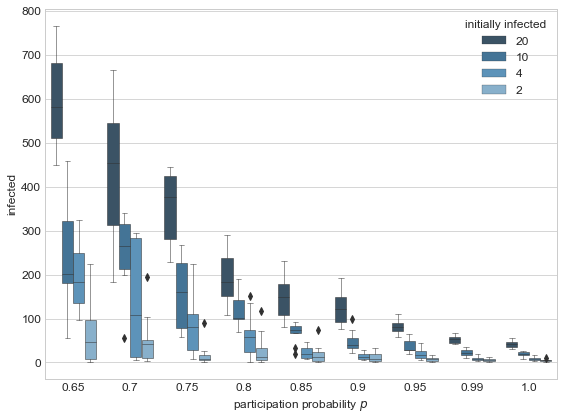

In [9]:
p_text = 'participation probability $p$'
plt.rcParams['figure.figsize'] = [8, 6]
font = {'size'   : 12}

plt.rc('font', **font)

last_days['infection_effectiveness'] = (3200 - last_days.S) / (2000* last_days['init'])
last_days['infected'] = 3200- last_days.S
last_days['rel_infected'] = (3200 - last_days.S)  / 2000
last_days['initially infected'] = 2000* last_days.init
last_days['initially infected'] = last_days['initially infected'].astype(int)
last_days[p_text] = last_days['p']
fig, axes = plt.subplots(1,1)
#axes = axes.flatten()
#sns.swarmplot(x = 'p', y = 'infected', hue = 'init', ax = axes[0], data = last_days)
#sns.swarmplot(x = 'p', y = 'infection_effectiveness', hue = 'init', ax = axes[1], data = last_days)
#sns.boxplot(x = 'p', y = 'infected', hue = 'init', ax = axes, data = last_days, linewidth=0.5, hue_order=[0.01, 0.005, 0.002, 0.001])
sns.boxplot(x = p_text, y = 'infected', hue = 'initially infected', 
            ax = axes, data = last_days, linewidth=0.5 , 
            hue_order=[20, 10, 4, 2], palette = 'Blues_d', showfliers = True)

#s andns.swarmplot(x = 'p', y = 'rel_infected', hue = 'init', ax = axes, data = last_days)
plt.tight_layout() 
plt.savefig('res_1.png')

* sample EDA

In [153]:
evolutions[(evolutions.p==0.65) & (evolutions['initially infected']==20) & (evolutions['day']==10)].sort_values('infected')

,I,Q,R,S,nP,init,p,quarantine,recovery,repl,day,initially infected,infected,day
day,,,,,,,,,,,,,,
10,56,60,0,3084,2000,0.010,0.650,7.000,14.000,92019,10,20,56,11
10,61,43,0,3096,2000,0.010,0.650,7.000,14.000,11933,10,20,61,11
10,62,58,0,3080,2000,0.010,0.650,7.000,14.000,9969,10,20,62,11
10,65,58,0,3077,2000,0.010,0.650,7.000,14.000,20697,10,20,65,11
10,71,59,0,3070,2000,0.010,0.650,7.000,14.000,39166,10,20,71,11
10,74,69,0,3057,2000,0.010,0.650,7.000,14.000,72251,10,20,74,11
10,84,62,0,3054,2000,0.010,0.650,7.000,14.000,14501,10,20,84,11
10,88,59,0,3053,2000,0.010,0.650,7.000,14.000,72964,10,20,88,11
10,91,72,0,3037,2000,0.010,0.650,7.000,14.000,66130,10,20,91,11


* evolutions figure

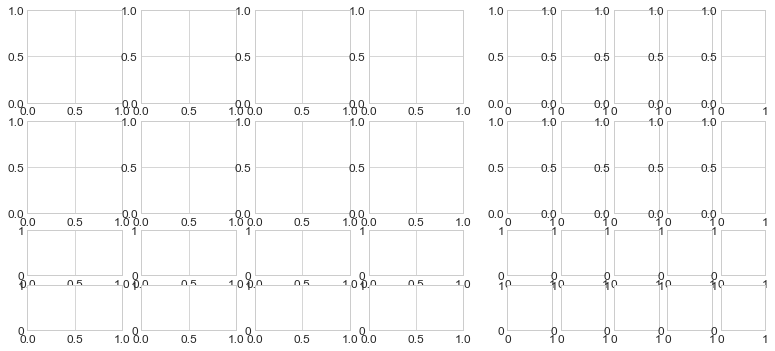

In [10]:
fig = plt.figure(figsize=(18, 18))
axes = list()
widths = [2,2,2,2,1,1,1,1,1]
heights = [2,2]
for row in range(2):
    axes += [fig.add_subplot(9,9,1+9*row)]
    axes += [fig.add_subplot(9,9,2+9*row)]
    axes += [fig.add_subplot(9,9,3+9*row)]
    axes += [fig.add_subplot(9,9,4+9*row)]
    axes += [fig.add_subplot(9,19,10+19*row)]
    axes += [fig.add_subplot(9,19,11+19*row)]
    axes += [fig.add_subplot(9,19,12+19*row)]
    axes += [fig.add_subplot(9,19,13+19*row)]
    axes += [fig.add_subplot(9,19,14+19*row)]
for row in [2,3]:
    axes += [fig.add_subplot(18,9,1+9*(row+2))]
    axes += [fig.add_subplot(18,9,2+9*(row+2))]
    axes += [fig.add_subplot(18,9,3+9*(row+2))]
    axes += [fig.add_subplot(18,9,4+9*(row+2))]
    axes += [fig.add_subplot(18,19,10+19*(row+2))]
    axes += [fig.add_subplot(18,19,11+19*(row+2))]
    axes += [fig.add_subplot(18,19,12+19*(row+2))]
    axes += [fig.add_subplot(18,19,13+19*(row+2))]
    axes += [fig.add_subplot(18,19,14+19*(row+2))]

axes = np.array(axes).reshape(9,4)      



plt.show()

/Users/rkucharski/anaconda3/envs/maassim/lib/python3.7/site-packages/ipykernel_launcher.py:85: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.


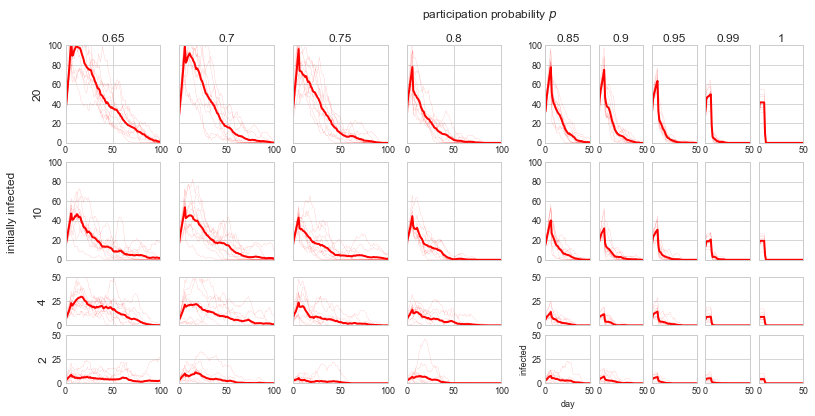

In [10]:
evolutions['initially infected'] = 2000* evolutions.init
evolutions['initially infected'] = evolutions['initially infected'].astype(int)
plt.rcParams['figure.figsize'] = [18, 19]
font = {'size'   : 12}

plt.rc('font', **font)
#plt.rcParams['figure.facecolor'] = 'white'
#plt.rcParams['axes.facecolor'] = 'white'
#fig, axes = plt.subplots(4,len(evolutions.p.unique()), sharey = True, sharex = True)
fig = plt.figure()
axes = list()
widths = [2,2,2,2,1,1,1,1,1]
heights = [2,2]
for row in range(2):
    axes += [fig.add_subplot(9,9,1+9*row)]
    axes += [fig.add_subplot(9,9,2+9*row)]
    axes += [fig.add_subplot(9,9,3+9*row)]
    axes += [fig.add_subplot(9,9,4+9*row)]
    axes += [fig.add_subplot(9,19,10+19*row)]
    axes += [fig.add_subplot(9,19,11+19*row)]
    axes += [fig.add_subplot(9,19,12+19*row)]
    axes += [fig.add_subplot(9,19,13+19*row)]
    axes += [fig.add_subplot(9,19,14+19*row)]
for row in [2,3]:
    axes += [fig.add_subplot(18,9,1+9*(row+2))]
    axes += [fig.add_subplot(18,9,2+9*(row+2))]
    axes += [fig.add_subplot(18,9,3+9*(row+2))]
    axes += [fig.add_subplot(18,9,4+9*(row+2))]
    axes += [fig.add_subplot(18,19,10+19*(row+2))]
    axes += [fig.add_subplot(18,19,11+19*(row+2))]
    axes += [fig.add_subplot(18,19,12+19*(row+2))]
    axes += [fig.add_subplot(18,19,13+19*(row+2))]
    axes += [fig.add_subplot(18,19,14+19*(row+2))]
axes = np.array(axes).reshape(4,9)  
fig.text(0.4, 0.9,p_text)
fig.text(0.08, 0.73, 'initially infected',rotation='vertical')
   
j = -1
for share in [20, 10, 4, 2]:
    df = evolutions[evolutions['initially infected'] == share]
    df = df[df.day<200]
    j += 1
    i=-1
    for p in [0.65, 0.7, 0.75,  0.8,  0.85, 0.9, 0.95, 0.99, 1]: 

        i +=1
        for repl in df[df.p == p].repl.unique():
            to_plot = df[(df.repl == repl) & (df.p == p)]
            to_plot.I.plot(ax=axes[j][i], lw = 0.2, color = 'red', alpha = 0.4)
            #to_plot.R.plot(ax=axes[j][i], lw = 0.3, color = 'green', alpha = 0.3)
        #to_plot = populations[populations.repl == repl]
        #plot_heat_infection(to_plot,axes[1][i], cbar = p ==0.99)
        #axes[1][i].set_xlim(0,800)
        #axes[1][i].set_ylim(0,200)
        to_plot = df[(df.p == p)]
        to_plot['d'] = to_plot['day']
        to_plot = to_plot.groupby('d')
        
        to_plot = to_plot.I.mean()
        
        to_plot.plot(ax=axes[j][i], lw = 2, color = 'red')
        #to_plot.R.mean().plot(ax=axes[j][i], lw = 2, color = 'green')

        if share == 20:
            axes[j][i].set_xlabel(p)
            axes[j][i].get_xaxis().set_label_position('top') 
        elif share == 2:
            axes[j][i].set_xlabel('') 
            
        else:
            axes[j][i].set_xlabel('')            
            axes[j][i].get_xaxis().set_ticklabels([])
        if p in [0.65]:
            axes[j][i].set_ylabel(share, rotation=90)
        elif p in [0.85]:
            if share == 2:
                axes[j][i].set_ylabel('infected', fontsize = 9)
                axes[j][i].set_xlabel('day', fontsize = 9)
        else:
            axes[j][i].get_yaxis().set_ticklabels([])
        axes[j][i].tick_params(axis='both', which='major', labelsize=9)
        axes[j][i].set_xlim((0,100 if p<0.85 else 50))
        axes[j][i].set_ylim((0,100 if share>5 else 50))

plt.tight_layout(rect=[0, 0.05, 0.95, 0.95])
plt.savefig('res_2.png', bbox_inches="tight")

* 3 figures on degree evolution and mitigation

/Users/rkucharski/anaconda3/envs/maassim/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


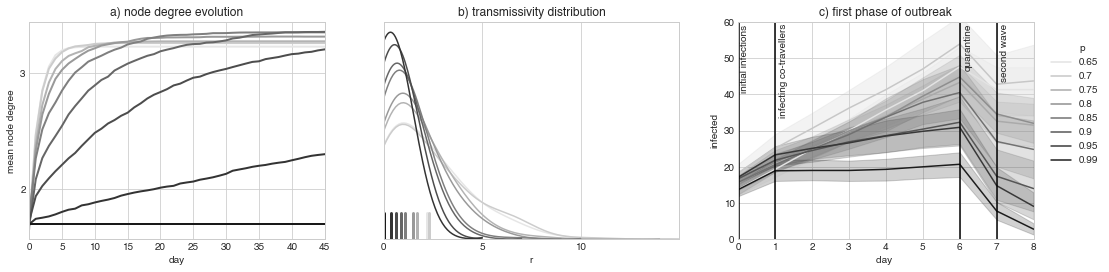

In [13]:
populations['initially infected'] = 2000* populations.init
populations['initially infected'] = populations['initially infected'].astype(int)
fig, axes = plt.subplots(1,3,figsize = (18,4))
font = {'size'   : 10}
plt.rc('font', **font)
plt.rcParams["font.family"] = "Helvetica"
colors = sns.color_palette("gist_yarg", 9)
share = 10
i=-1
for p in [0.65, 0.7, 0.75,  0.8,  0.85, 0.9, 0.95, 0.99, 1]: 
    i+=1
    df = populations[populations['initially infected'] == share]
    to_plot = df[(df.p == p)]
    to_plot['r'] = to_plot.apply(lambda x: None if pd.isnull(x.infection_day) else len(to_plot[to_plot.infected_by == x.name]), axis = 1)      
    to_plot = to_plot.dropna()
    to_plot['r'] = to_plot['r'].astype(int)
    sns.distplot(to_plot.r, kde = True, ax = axes[1], hist = False, 
                        norm_hist = False, hist_kws = {"alpha":  0.5}, kde_kws={'bw': 1}, color = colors[i],
                        bins=np.arange(to_plot.r.min(), to_plot.r.max() + 1))
    
    axes[1].axvline(to_plot['r'].mean(),0,0.12, lw = 3, color = colors[i])
    #ax.axvline(x = to_plot.r.mean(), lw = 1, color = colors[i])
    #ax.text(x=to_plot.r.mean(), y = 0.43,s = p,rotation=90)
axes[1].set_xlim(0,15)

d = pd.read_csv('../../data/corona/degrees.csv', index_col = 0)
d['y'] = d['mean']-0.8
p = [0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 1]
repl = 0
#for repl in range(10):
#    sns.lineplot(data =d[d.repl == repl],y = 'mean', x='day', hue = 'p', palette =sns.color_palette("gist_yarg", 9), lw = 0.5, alpha = 0.3, ax = ax, legend = False)
sns.lineplot(data =d[d.repl == repl],y = 'y', x='day', hue = 'p', palette =sns.color_palette("gist_yarg", 9), lw = 2, ax = axes[0])


axes[0].set_ylabel('mean node degree')
axes[1].set_ylabel('')
axes[1].set_yticklabels([])


evolutions['initially infected'] = 2000* evolutions.init
evolutions['initially infected'] = evolutions['initially infected'].astype(int)
evolutions['infected'] = evolutions.I
evolutions['day '] = evolutions['day']
plt.rcParams['figure.figsize'] = [6, 4]
sns.lineplot(data = evolutions[(evolutions['initially infected']==10) & (evolutions.day<=8) &  (evolutions.day>=0) & (evolutions['p']<1)], 
             x = 'day ', y = 'infected', 
             hue = 'p', hue_order = [0.65, 0.7, 0.75,  0.8,  0.85, 0.9, 0.95, 0.99], palette =sns.color_palette("gist_yarg", 8), ax = axes[2])
axes[0].get_legend().remove()
axes[1].set_xlim(0,15)
axes[0].set_xlim(0,45)


#axes[1].get_legend().remove()
axes[2].legend(bbox_to_anchor=(1.25, 0.3),loc='lower right')

axes[0].set_title('a) node degree evolution')
axes[1].set_title('b) transmissivity distribution')
axes[2].set_title('c) first phase of outbreak')

axes[2].axvline(0.03,color = 'black')
axes[2].set_ylim(0,60)
axes[2].set_xlim(0,8)
axes[2].text(0.05,41,'initial infections',rotation=90, fontsize = 10)
axes[2].axvline(1,color = 'black')
axes[2].text(1.1,34,'infecting co-travellers',rotation=90, fontsize = 10)
axes[2].axvline(6,color = 'black')
axes[2].text(6.1,47,'quarantine',rotation=90, fontsize = 10)
axes[2].axvline(7,color = 'black')
axes[2].text(7.1,44,'second wave',rotation=90, fontsize = 10)


axes[0].set_yticks([2,3])
axes[1].yaxis.grid(False, which='both')
axes[1].set_yticklabels([])
axes[1].set_xticks([0,5,10])
axes[1].set_yticklabels([])

#plt.tight_layout()
plt.savefig('3res.png')


* spatial extent


In [14]:
from IPython.display import Image
import selenium.webdriver
from geojson.feature import *

In [15]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw , ImageOps

In [18]:
import ExMAS.utils
from ExMAS.utils import inData as inData
params = ExMAS.utils.get_config('../../data/configs/default.json') # load the default 
params.city = 'Amsterdam, Netherlands'
params.t0 = '17:00'
params.paths.G = '../../data/graphs/Amsterdam.graphml'
params.paths.skim = '../../data/graphs/Amsterdam.csv'
nodes = ExMAS.utils.load_G(inData, params, stats=True).nodes  # download the graph

In [21]:
requests = pd.read_csv('../../data/corona/requests.csv')
requests.shape

(3200, 11)

In [23]:
APERTURE_SIZE = 8
requests = pd.read_csv('../../data/corona/requests.csv')
requests['ox'] = requests.apply(lambda r: inData.nodes.loc[r.origin].x, axis =1)
requests['oy'] = requests.apply(lambda r: inData.nodes.loc[r.origin].y, axis =1)
requests['dx'] = requests.apply(lambda r: inData.nodes.loc[r.destination].x, axis =1)
requests['dy'] = requests.apply(lambda r: inData.nodes.loc[r.destination].y, axis =1)
requests['hex_o'] = requests.apply(lambda x: h3.geo_to_h3(x.oy,x.ox,APERTURE_SIZE),1)
requests['hex_d'] = requests.apply(lambda x: h3.geo_to_h3(x.dy,x.dx,APERTURE_SIZE),1)
hexes = pd.Series(list(set(list(requests.hex_o.unique())+list(requests.hex_d.unique())))).to_frame('hex_id')
hexes['geom'] = hexes.apply(lambda x: {"type": "Polygon","coordinates": [h3.h3_to_geo_boundary(h = x.hex_id, geo_json = True)]}, axis = 1)
hexes = hexes.set_index('hex_id')
hexes['hex_id'] = hexes.index.copy()

In [24]:
def heat(requests, hexes, repl = None, od = 'hex_o', col = 'count', image = False):
    if repl is None:
        repl = populations.repl.sample(1).values[0]
    population = populations[populations.repl == repl]
    data = population[population.infection_day>=-3]
    data[od] = requests.loc[data.index][od].values
    hexes['count'] = data.groupby(od).size()
    hexes['day'] = data.groupby(od).infection_day.min()
    hexes['hex_id'] = hexes.index.copy()
    hexes = hexes[hexes['count']>0]
    
    list_features = []
    for i, row in hexes.iterrows():
        feature = Feature(geometry = row["geom"],
                          id = row["hex_id"],
                          properties = {"resolution": 9})
        list_features.append(feature)
        
    CENTER = [52.3703923, 4.877417]
    tile = 'cartodbpositron'

    feat_collection = FeatureCollection(list_features)
    geojson_hexes = json.dumps(feat_collection)
    base_map = folium.Map(location=CENTER, zoom_start=13,tiles=tile, zoomControl =  False)
    if col == 'count':
        m = folium.Choropleth(geo_data = geojson_hexes,data = hexes, columns = ['hex_id',col],key_on ="feature.id",
            control = False, fill_color = 'YlOrBr', bins = [-1, 0, 100,1000], #0, 1, 2, 5, 10, 20],
            fill_opacity=1, line_opacity=0.1).add_to(base_map)
    else:
        m = folium.Choropleth(geo_data = geojson_hexes,data = hexes, columns = ['hex_id',col],key_on ="feature.id",
            control = False, fill_color = 'RdPu', bins = [-1, 0, 1, 5, 10, 20, 40, 60],
            fill_opacity=1, line_opacity=0.1).add_to(base_map)

    for key in m._children:
        if key.startswith('color_map'):
            del(m._children[key])
    if not image:
        return base_map
    else:
        pix = 1000
        base_map.save('map.html')
        driver = selenium.webdriver.PhantomJS(executable_path=phantom_path)
        driver.set_window_size(pix, pix)  # choose a resolution
        driver.get('map.html')
        # You may need to add time.sleep(seconds) here
        filename = '../../data/corona/maps/{}_{}_{}.png'.format(col, population.p.max(),repl)
        driver.save_screenshot(filename)
        del base_map
        del driver
        
        #return Image(filename=filename) 

for p in [0.65, 0.7, 0.75,  0.8,  0.85, 0.9, 0.95, 0.99, 1]: 
     for i in range(5):
            repl = populations[(populations.p == p) & (populations['initially infected'] == 2)].repl.sample(1).values[0]
            #try:
            base_map = heat(requests, hexes, repl = repl, image = True)
            #except:
            #    pass
heat(requests, hexes,  image = False)

IndexError: list index out of range

In [4]:
def make_collage(size = 500, level = 9, big = False, file_header = 'HEXES'):
    names = ['1.png','2.png','3.png','5.png','6.png','7.png']
    names = names[::-1]
    rows = 1
    cols = 6
    header = 50
    FIELDS = ['p = 0.65','0.7','0.75','0.85','0.9', '0.95', '1']
    #names = ['a) PT travel time','b) Uber travel time', 'c) Time Gap', 'd) Cost Gap', 'e) Uber added value' ]
    city_names = ['', 'Warsaw, PL', 'Stockholm, SE']
    filename = 'res_6.png'
    for CITIES in [['Amsterdam', 'Warsaw', 'Stockholm'],['DC', 'Houston', 'NYC']]:
        new_im = Image.new('RGB', (size*cols+3*header,size*rows+2*header), (255,255,255))
        font = ImageFont.truetype("Avenir.ttc", 30)
        draw = ImageDraw.Draw(new_im)
        for i in range(0,size*cols,size):
            shift = 0
            if names[int(i/size)] in ['Time Gap']:
                shift = header
            if names[int(i/size)] == 'Cost Gap':
                shift = 50
            if names[int(i/size)] == 'Uber added value':
                shift = header+50
            draw.text((int(header)+i+10+shift, 20),FIELDS[int(i/size)],(0,0,0),font=font)
            for j in range(0,size*rows,size):
                PATH = 'corona/maps/'+names[int(i/size)]
                #'../data/results/figs/{}_{}_{}_{}.png'.format(file_header, level, CITIES[int(j/size)],  FIELDS[int(i/size)])
                print(PATH, j, size)
                im = Image.open(PATH)
                im.thumbnail((size*0.99,size*0.99))
                if i == 0:
                    txt=Image.new('L', (250,50))
                    d = ImageDraw.Draw(txt)
                    d.text( (0, 0), city_names[int(j/size)],  font=font, fill=255)
                    w=txt.rotate(90,  expand=1)
                    new_im.paste( ImageOps.colorize(w, (0,0,0), (0,0,0)), (int(header/3),j+int(size/2)),  w)
                new_im.paste(im, (header+i+int(size/100)+shift,header+j+int(size/100)))
#         im = Image.open('../data/results/figs/scale_1.png')
#         im.thumbnail((size*0.8,header))
#         new_im.paste(im, (400,3*size+header))
#         im = Image.open('../data/results/figs/scale_2.png')
#         im.thumbnail((size*0.8,header))
#         new_im.paste(im, (header+1400,3*size+header))
#         im = Image.open('../data/results/figs/scale_3.png')
#         im.thumbnail((size*0.8,header))
#         new_im.paste(im, (header+2150,3*size+header))
        new_im.save(filename)
make_collage()        
        

corona/maps/7.png 0 500
corona/maps/6.png 0 500
corona/maps/5.png 0 500
corona/maps/3.png 0 500
corona/maps/2.png 0 500
corona/maps/1.png 0 500
corona/maps/7.png 0 500
corona/maps/6.png 0 500
corona/maps/5.png 0 500
corona/maps/3.png 0 500
corona/maps/2.png 0 500
corona/maps/1.png 0 500


---
# Sandbox 
---

other plots that did not make it to the paper

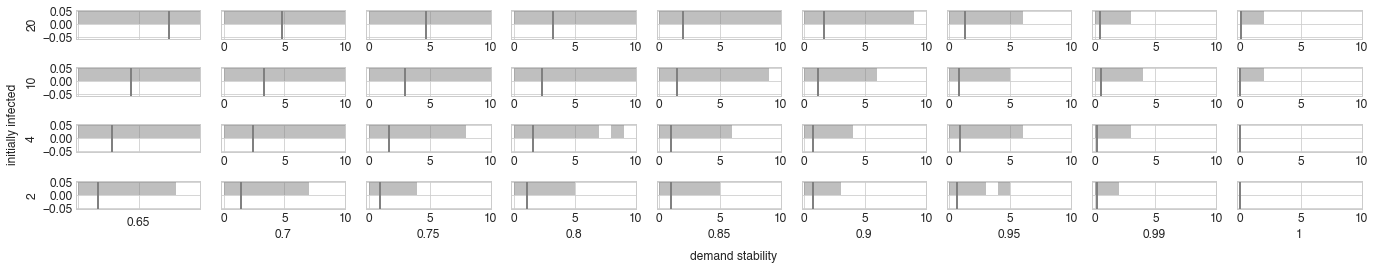

In [68]:
populations['initially infected'] = 2000* populations.init
populations['initially infected'] = populations['initially infected'].astype(int)
plt.rcParams['figure.figsize'] = [20, 4]
font = {'size'   : 12}

plt.rc('font', **font)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
fig, axes = plt.subplots(4,len(evolutions.p.unique()), sharey = True)
j = -1
for share in [20, 10, 4, 2]:
    df = populations[populations['initially infected'] == share]
    j += 1
    i=-1
    for p in [0.65, 0.7, 0.75,  0.8,  0.85, 0.9, 0.95, 0.99, 1]: 
        i +=1
#         for repl in df[df.p == p].repl.unique():
#             to_plot = df[(df.repl == repl) & (df.p == p)]
#             to_plot['r'] = to_plot.apply(lambda x: None if pd.isnull(x.infection_day) else len(to_plot[to_plot.infected_by == x.name]), axis = 1)
# #             sns.distplot(to_plot.r, ax=axes[j][i], kde = False, 
# #                          norm_hist = True, hist_kws = {"alpha":  0.3}, 
# #                          color = 'blue', bins=np.arange(to_plot.r.min(), to_plot.r.max() + 1))
#             sns.distplot(to_plot.r, hist = False, norm_hist = True, ax=axes[j][i], kde_kws={'bw': 0.5}, 
#                          bins=np.arange(to_plot.r.min(), to_plot.r.max() + 1), color = 'blue') #, lw = 2, color = 'red', kind = 'hist', alpha = 0.3)

            #to_plot.r.plot.kde(ax=axes[j][i], lw = 0.3, color = 'blue', hist_kws={"alpha": 0.5})
            #to_plot.R.plot(ax=axes[j][i], lw = 0.3, color = 'green', alpha = 0.3)
        #to_plot = populations[populations.repl == repl]

        #axes[1][i].set_xlim(0,800)
        #axes[1][i].set_ylim(0,200)
        to_plot = df[(df.p == p)]
        to_plot['r'] = to_plot.apply(lambda x: None if pd.isnull(x.infection_day) else len(to_plot[to_plot.infected_by == x.name]), axis = 1)      
        to_plot = to_plot.dropna()
        to_plot['r'] = to_plot['r'].astype(int)
#         sns.distplot(to_plot.r, ax=axes[j][i], kde = True, hist = False, 
#                          norm_hist = False, hist_kws = {"alpha":  0.3}, kde_kws={'bw': 0.5}, 
#                          color = 'blue', bins=np.arange(to_plot.r.min(), to_plot.r.max() + 1))
        sns.distplot(to_plot.r, ax=axes[j][i], kde = False, hist = True, color = 'grey',
                         norm_hist = False, hist_kws = {"alpha":  0.5}, kde_kws={'bw': 0.5}, 
                        bins=np.arange(to_plot.r.min(), to_plot.r.max() + 1))
#         sns.distplot(to_plot.r, ax=axes[j][i], kde = False, hist = True, 
#                          norm_hist = False, hist_kws = {"alpha":  0.3}, kde_kws={'bw': 0.5}, 
#                          color = 'blue', bins=np.arange(to_plot.r.min(), to_plot.r.max() + 1))
        #sns.distplot(to_plot.r, hist = False, ax=axes[j][i], bins = 11) #, lw = 2, color = 'red', kind = 'hist', alpha = 0.3)
        
        axes[j][i].axvline(x = to_plot.r.mean(), lw = 2, color = 'grey')
        if share == 2:
            axes[j][i].set_xlabel(p)
            #axes[j][i].get_xaxis().set_ticks([0,5,10])
        else:
            axes[j][i].set_xlabel('')
           #axes[j][i].get_xaxis().set_ticks([0,5,10])
            #axes[j][i].get_xaxis().set_ticks([])
        if p == 0.65:
            axes[j][i].set_xticklabels([])
            axes[j][i].set_ylabel(share)
        else:
            pass
            #axes[j][i].get_yaxis().set_ticks([])
        axes[j][i].set_xlim((-0.2,10))  
fig.text(0.5, 0.04, 'demand stability', ha='center', va='center')
fig.text(0, 0.5, 'initially infected', ha='center', va='center', rotation='vertical')

plt.tight_layout(rect=[0, 0.05, 0.95, 0.95])
plt.savefig('res_4.png')

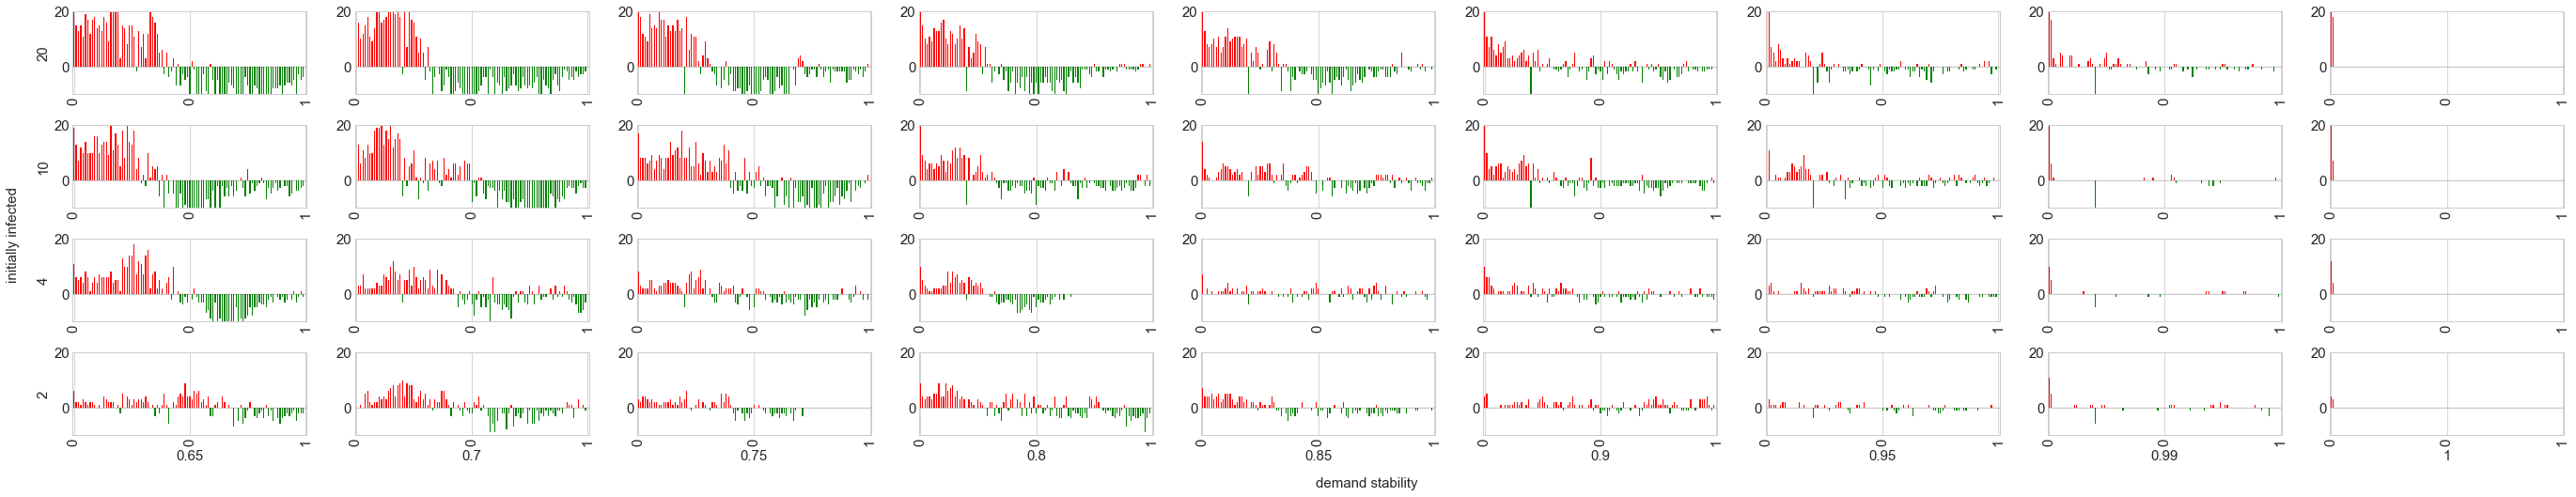

In [22]:
plt.rcParams['figure.figsize'] = [40, 8]
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
font = {'size'   : 15}

plt.rc('font', **font)
fig, axes = plt.subplots(4,len(evolutions.p.unique()))
j = -1
for share in [20, 10, 4, 2]:
    df = evolutions[evolutions['initially infected'] == share]
    df = df[df.day<100]
    j += 1
    i=-1
    for p in [0.65, 0.7, 0.75,  0.8,  0.85, 0.9, 0.95, 0.99, 1]: 

        i +=1
        best = 0 
        for repl in df[df.p == p].repl.unique():
            to_plot = df[(df.repl == repl) & (df.p == p)]
            if to_plot.I.max()>best:
                best = to_plot.I.max()
                
                rep = repl
            
        #    pass
        #    #to_plot = df[(df.repl == repl) & (df.p == p)]
        #    #to_plot.I.plot(ax=axes[j][i], lw = 0.3, color = 'red', alpha = 0.3)
        #    #to_plot.R.plot(ax=axes[j][i], lw = 0.3, color = 'green', alpha = 0.3)
        #rep = df[df.p == p].repl.sample(1).values[0]
        
        to_plot = df[df.repl == rep]
        first = to_plot.I.loc[0]
        #plot_heat_infection(to_plot,axes[1][i], cbar = p ==0.99)
        #axes[1][i].set_xlim(0,800)
        #axes[1][i].set_ylim(0,200)
        to_plot  = (to_plot.Q + to_plot.I).diff(1).shift(-1)
        to_plot = pd.concat([pd.Series([first]),to_plot]).to_frame()
        to_plot['positive'] = to_plot[0]>0 #  
        to_plot[0].plot(kind='bar', ax = axes[j][i], color=to_plot.positive.map({True: 'r', False: 'g'}))
        
        #to_plot = df[(df.p == p)]
        #to_plot['d'] = to_plot['day']
        #to_plot = to_plot.groupby('d')
        #to_plot.I.mean().plot(ax=axes[j][i], lw = 2, color = 'red')
        #to_plot.R.mean().plot(ax=axes[j][i], lw = 2, color = 'green')
        axes[j][i].axhline(y=0, color='black', lw = 0.1)
        if share == 2:
            axes[j][i].set_xlabel(p)
            axes[j][i].get_xaxis().set_ticks([0,50,100])
        else:
            axes[j][i].get_xaxis().set_ticks([0,50,100])
            axes[j][i].set_xlabel('')
            #axes[j][i].get_xaxis().set_ticks([])
        if p == 0.65:
            axes[j][i].set_ylabel(share)
        else:
            pass
            #axes[j][i].get_yaxis().set_ticks([])
        axes[j][i].set_ylim((-10,20))  
        #axes[j][i].set_title(repl)  
        #axes[j][i].set_xlim((-1,200))  
fig.text(0.5, 0.04, 'demand stability', ha='center', va='center')
fig.text(0, 0.5, 'initially infected', ha='center', va='center', rotation='vertical')
plt.tight_layout(rect=[0, 0.05, 0.95, 0.95])

plt.savefig('res_3.png')

In [1]:
path = '../data/corona/results'
for filename in os.listdir(path):
    if filename.startswith('population'):
        if filename.endswith('35250.csv'):
            df = pd.read_csv(os.path.join(path,filename), index_col = 0)
            break 

NameError: name 'os' is not defined

In [72]:
passengers = pd.read_csv('../data/corona/results/passengers.csv')
population.sample(10)

,Unnamed: 0.1,pos,status,platforms,active,state,quarantine_day,active_today,infection_day,infected_by,newly_quarantined,nP,init,p,quarantine,recovery,repl,initially infected,pax_id
41,42,46408934,0,[-1],True,S,nan,False,nan,nan,False,2000.000,0.010,0.650,7.000,14.000,35250.000,20,2427
473,474,418147010,0,[0],True,R,13.000,True,6.000,413.000,False,2000.000,0.010,0.650,7.000,14.000,35250.000,20,474
2130,2131,1221182557,0,[-1],True,R,27.000,False,20.000,2000.000,False,2000.000,0.010,0.650,7.000,14.000,35250.000,20,2458
3121,3122,46173800,0,[0],True,R,28.000,True,21.000,3063.000,False,2000.000,0.010,0.650,7.000,14.000,35250.000,20,2482
918,919,46396066,0,[0],True,S,nan,True,nan,nan,False,2000.000,0.010,0.650,7.000,14.000,35250.000,20,1990
3046,3047,46343002,0,[0],True,R,23.000,True,16.000,3163.000,False,2000.000,0.010,0.650,7.000,14.000,35250.000,20,1025
75,76,1029673119,0,[0],True,S,nan,True,nan,nan,False,2000.000,0.010,0.650,7.000,14.000,35250.000,20,2304
2644,2645,46347861,0,[-1],True,R,53.000,False,46.000,2572.000,False,2000.000,0.010,0.650,7.000,14.000,35250.000,20,246
1846,1847,46421895,0,[-1],True,R,61.000,False,54.000,1707.000,False,2000.000,0.010,0.650,7.000,14.000,35250.000,20,2379
1157,1158,1318851540,0,[0],True,S,nan,True,nan,nan,False,2000.000,0.010,0.650,7.000,14.000,35250.000,20,574


In [61]:
population = populations[populations.repl == 35250]
population['pax_id'] = population.apply(lambda x: requests.loc[x.name].pax_id,axis = 1)

In [84]:
requests

,Unnamed: 0,origin,destination,treq,tdep,ttrav,tarr,tdrop,dist,pax_id,platform
0,2200,46405187,3301117463,2020-08-20 11:08:13.213934,nan,0 days 01:27:50.000000000,2020-08-20 12:36:03.213934,nan,5270,2200,0
1,2370,46350271,2311168475,2020-08-20 11:08:13.213934,nan,0 days 00:37:12.000000000,2020-08-20 11:45:25.213934,nan,2232,2370,0
2,46,46316927,46404816,2020-08-20 11:08:16.213934,nan,0 days 00:44:14.000000000,2020-08-20 11:52:30.213934,nan,2654,46,0
3,78,3926140288,46442235,2020-08-20 11:08:16.213934,nan,0 days 01:22:42.000000000,2020-08-20 12:30:58.213934,nan,4962,78,0
4,920,46382632,4924402828,2020-08-20 11:08:17.213934,nan,0 days 00:41:27.000000000,2020-08-20 11:49:44.213934,nan,2487,920,0
...,...,...,...,...,...,...,...,...,...,...,...
3195,587,46356277,2297714226,2020-08-20 15:07:50.213934,nan,0 days 01:45:54.000000000,2020-08-20 16:53:44.213934,nan,6354,587,0
3196,1707,1437762783,46325757,2020-08-20 15:07:51.213934,nan,0 days 00:20:40.000000000,2020-08-20 15:28:31.213934,nan,1240,1707,0
3197,740,46330620,271391422,2020-08-20 15:08:07.213934,nan,0 days 01:14:57.000000000,2020-08-20 16:23:04.213934,nan,4497,740,0
3198,31,46299414,46435792,2020-08-20 15:08:07.213934,nan,0 days 01:32:17.000000000,2020-08-20 16:40:24.213934,nan,5537,31,0


In [86]:
population['pax_id'] = population.apply(lambda x: requests.loc[x.name].pax_id,axis = 1)

In [92]:
initial_infectors = population[population.infection_day <=0].pax_id
initial_infectors.values

array([ 541, 1488,  164, 1000, 1945, 1704,  947, 1113, 2246, 2714,  722,
       2075, 1265,  186, 3157, 1462, 2635, 1611, 2202,  250, 1742, 3149,
       2951, 2092])

In [96]:
def infection_map(df):
    """
    traces infections from initial ones
    :param inData:
    :return: dictionary infection_map[intial_infector][level][list of travellers infected at this step]
    """
    df['pax_id'] = df.apply(lambda x: requests.loc[x.name].pax_id,axis = 1)
    df['pax_id'] = df.index.copy()
    infection_map = dict()
    initial_infectors = df[df.infection_day <=0].pax_id
    
    #df = df[df.infected_by>0]
    #df['infected_by'] = df['infected_by'].astype(int)    
    
    for i in initial_infectors:
        infection_map[i] = dict()
        level = 1
        infection_map[i][level] = list(df[df.infected_by == i].pax_id)
        while len(infection_map[i][level]) > 0:
            print(i, level)
            
            level += 1
            infection_map[i][level] = list(
                df[df.infected_by.isin(infection_map[i][level - 1])].pax_id)
        
        
    return infection_map
infection_map(population)

439 1
439 2
617 1
617 2
617 3
617 4
617 5
624 1
624 2
686 1
686 2
693 1
693 2
693 3
693 4
693 5
693 6
693 7
1362 1
1424 1
1424 2
1424 3
1467 1
1732 1
2093 1
2093 2


{139: {1: []},
 176: {1: []},
 439: {1: [365], 2: [434, 509], 3: []},
 617: {1: [649, 657], 2: [708], 3: [713], 4: [765], 5: [647, 744], 6: []},
 624: {1: [691], 2: [608], 3: []},
 679: {1: []},
 686: {1: [764, 773, 780], 2: [831], 3: []},
 693: {1: [569, 681],
  2: [651, 698],
  3: [601],
  4: [553, 660],
  5: [643, 770],
  6: [705, 806],
  7: [735],
  8: []},
 775: {1: []},
 854: {1: []},
 1135: {1: []},
 1362: {1: [1413], 2: []},
 1420: {1: []},
 1424: {1: [1414, 1421], 2: [1292, 1398], 3: [1240], 4: []},
 1467: {1: [1583], 2: []},
 1656: {1: []},
 1732: {1: [1853], 2: []},
 2093: {1: [2105, 2127], 2: [2074], 3: []},
 2094: {1: []},
 2620: {1: []},
 2692: {1: []},
 2841: {1: []},
 3002: {1: []},
 3149: {1: []}}

In [83]:
population = populations[populations.repl == 35250]
inf_map = infection_map(population)
inf_map

KeyError: -1

,1,2,3,4,5,6,7,8,all_infected,n_infected,degree
139,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],0,1
176,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],0,1
439,[365],"[434, 509]",[],NaN,NaN,NaN,NaN,NaN,"[365, 434, 509]",3,3
617,"[649, 657]",[708],[713],[765],"[647, 744]",[],NaN,NaN,"[649, 657, 708, 713, 765, 647, 744]",7,6
624,[691],[608],[],NaN,NaN,NaN,NaN,NaN,"[691, 608]",2,3
679,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],0,1
686,"[764, 773, 780]",[831],[],NaN,NaN,NaN,NaN,NaN,"[764, 773, 780, 831]",4,3
693,"[569, 681]","[651, 698]",[601],"[553, 660]","[643, 770]","[705, 806]",[735],[],"[569, 681, 651, 698, 601, 553, 660, 643, 770, ...",12,8
775,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],0,1
854,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],0,1


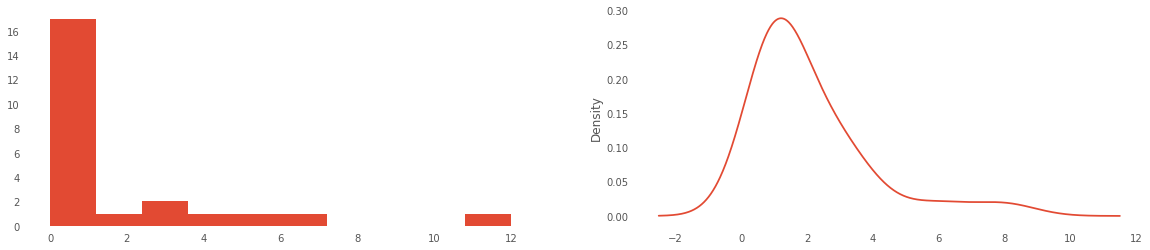

In [110]:
inf_map = pd.DataFrame(inf_map).T
lens, rets, degs = dict(), dict(), dict()
fig, axes = plt.subplots(1,2)
for i, infector in inf_map.iterrows():
    j = 1
    ret = infector[1].copy()
    while len(infector[j]) > 0:
        j += 1
        ret += infector[j]

    rets[i] = ret
    lens[i] = len(ret)
    degs[i] = j
inf_map['all_infected'] = pd.Series(rets)
inf_map['n_infected'] = pd.Series(lens)
inf_map['degree'] = pd.Series(degs)
inf_map.n_infected.hist(ax=axes[0])

inf_map.degree.plot.kde(ax=axes[1])
inf_map

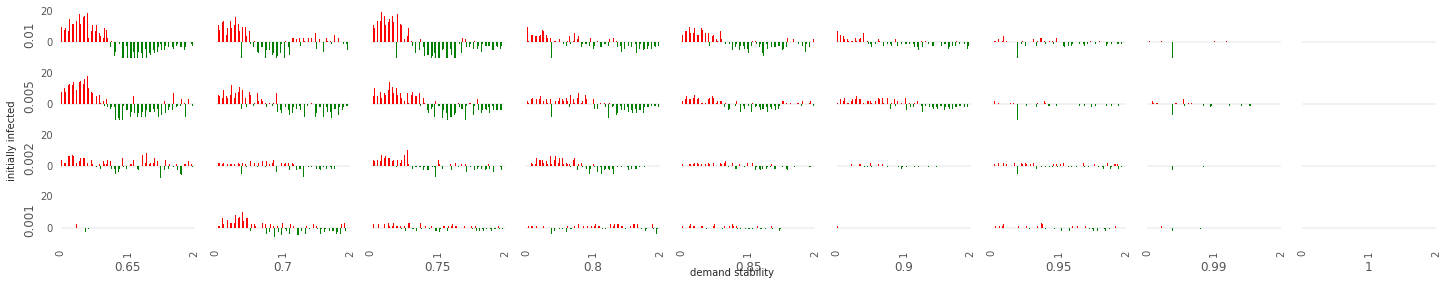

In [86]:
plt.rcParams['figure.figsize'] = [20, 4]
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
fig, axes = plt.subplots(4,len(evolutions.p.unique()))
j = -1
for share in [0.01, 0.005, 0.002, 0.001]:
    df = evolutions[evolutions.init == share]
    df = df[df.day<100]
    j += 1
    i=-1
    for p in [0.65, 0.7, 0.75,  0.8,  0.85, 0.9, 0.95, 0.99, 1]: 

        i +=1
        #for repl in df[df.p == p].repl.unique():
        #    pass
            #to_plot = df[(df.repl == repl) & (df.p == p)]
            #to_plot.I.plot(ax=axes[j][i], lw = 0.3, color = 'red', alpha = 0.3)
            #to_plot.R.plot(ax=axes[j][i], lw = 0.3, color = 'green', alpha = 0.3)
        repl = df[df.p == p].repl.sample(1).values[0]
        to_plot = df[df.repl == repl]
        #plot_heat_infection(to_plot,axes[1][i], cbar = p ==0.99)
        #axes[1][i].set_xlim(0,800)
        #axes[1][i].set_ylim(0,200)
        to_plot  = (to_plot.Q + to_plot.I).diff(1).shift(-1).to_frame()
        to_plot['positive'] = to_plot[0]>0 #  
        to_plot[0].plot(kind='bar', ax = axes[j][i], color=to_plot.positive.map({True: 'r', False: 'g'}))
        
        #to_plot = df[(df.p == p)]
        #to_plot['d'] = to_plot['day']
        #to_plot = to_plot.groupby('d')
        #to_plot.I.mean().plot(ax=axes[j][i], lw = 2, color = 'red')
        #to_plot.R.mean().plot(ax=axes[j][i], lw = 2, color = 'green')
        axes[j][i].axhline(y=0, color='black', lw = 0.1)
        if share == 0.001:
            axes[j][i].set_xlabel(p)
            axes[j][i].get_xaxis().set_ticks([0,50,100])
        else:
            axes[j][i].set_xlabel('')
            axes[j][i].get_xaxis().set_ticks([])
        if p == 0.65:
            axes[j][i].set_ylabel(share)
        else:
            axes[j][i].get_yaxis().set_ticks([])
        axes[j][i].set_ylim((-10,20))  
fig.text(0.5, 0.04, 'demand stability', ha='center', va='center')
fig.text(0, 0.5, 'initially infected', ha='center', va='center', rotation='vertical')

plt.tight_layout()
    

/Users/rkucharski/anaconda3/envs/ExMAS/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/rkucharski/anaconda3/envs/ExMAS/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/rkucharski/anaconda3/envs/ExMAS/lib/python3.7/site-packages/ipykernel_launcher.py:45: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


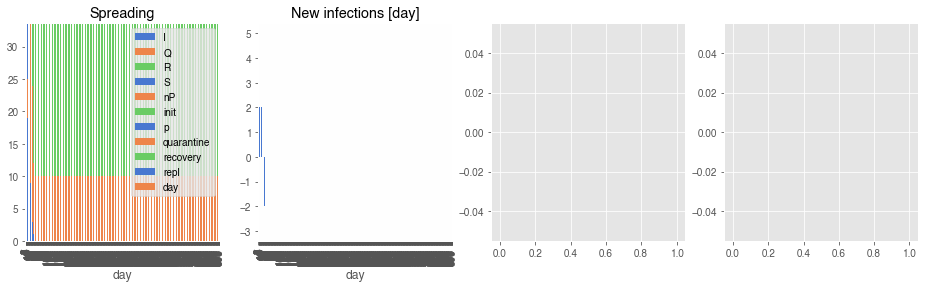

In [280]:
def plot_spread(evolution, population, MODE='paths'):
    """
    plots results of spreading on three plots
    1. travellers in respective states (S -> I -> Q ) over days
    2. number of new infections per day
    3. maps
    :param inData:
    :param MODE:
    :return:
    """
    import seaborn as sns
    plt.rcParams['figure.figsize'] = [16, 4]
    plt.rcParams["font.family"] = "Helvetica"
    plt.style.use('ggplot')
    colors = sns.color_palette("muted")

    fig, axes = plt.subplots(1, 4)
    #df = inData.report.T.fillna(0)
    evolution.plot(kind='bar', stacked=True, color=colors[:3], ax=axes[0])
    axes[0].set_ylim([0, evolution.Q.max() * 1.2])

    (evolution.Q + evolution.I).diff(1).shift(-1).plot(kind='bar', color=colors[0], ax=axes[1])

    axes[0].set_title('Spreading')
    axes[0].set_xlabel('day')
    axes[1].set_xlabel('day')
    axes[1].set_title('New infections [day]')

    inf_map = infection_map(population)
    inf_map = pd.DataFrame(inf_map).T
    lens, rets, degs = dict(), dict(), dict()

    for i, infector in inf_map.iterrows():
        j = 1
        ret = infector[1].copy()
        while len(infector[j]) > 0:
            j += 1
            ret += infector[j]

        rets[i] = ret
        lens[i] = len(ret)
        degs[i] = j
    inf_map['all_infected'] = pd.Series(rets)
    inf_map['n_infected'] = pd.Series(lens)
    inf_map['degree'] = pd.Series(degs)
    inf_map.n_infected.hist(ax=axes[2])

    inf_map.degree.hist(ax=axes[3])

    plt.show()
repl = evolutions.repl.sample(1).values[0]

evolution = evolutions[evolutions.repl == repl]
population = populations[populations.repl == repl]
plot_spread(evolution, population)

1171.0

In [166]:
repl = evolutions.repl.sample(1).values[0]

evolution = evolutions[evolutions.repl == repl]
df = populations[populations.repl == repl]

In [167]:
initial_infectors = df[df.infection_day <=0].index
#print(initial_infectors[3])
#pierwsi = df[df.infected_by == initial_infectors[3]]
#print(pierwsi.index)
df[df.infection_day>0]

,Unnamed: 0.1,active,active_today,infected_by,infection_day,init,nP,newly_quarantined,p,platforms,pos,quarantine,quarantine_day,recovery,repl,state,status
31,32,True,True,95.000,1.000,0.002,2000.000,True,1.000,[0],3780287879,7.000,8.000,14.000,97155.000,Q,0
757,758,True,True,669.000,1.000,0.002,2000.000,True,1.000,[0],332242115,7.000,8.000,14.000,97155.000,Q,0
2262,2263,True,True,2213.000,1.000,0.002,2000.000,True,1.000,[0],46360267,7.000,8.000,14.000,97155.000,Q,0


In [168]:
initial_infectors

Int64Index([95, 669, 870, 1450, 2213, 2259], dtype='int64')

In [64]:
path = '../data/corona/results'
for filename in os.listdir(path):
    if filename.startswith('population'):
        if filename.endswith('35250.csv'):
            df = pd.read_csv(os.path.join(path,filename), index_col = 0)
            break 
def infection_map(df):
    """
    traces infections from initial ones
    :param inData:
    :return: dictionary infection_map[intial_infector][level][list of travellers infected at this step]
    """
    #df.index = df['Unnamed: 0.1']
    infection_map = dict()
    initial_infectors = df[df.infection_day <=0].pax_id
    print(initial_infectors)
    
    df = df[df.infected_by>0]
    df['infected_by'] = df['infected_by'].astype(int)    
    
    for i in initial_infectors:
        infection_map[i] = dict()
        level = 1
        infection_map[i][level] = list(df[df.infected_by == i].pax_id)
        while len(infection_map[i][level]) > 0:
            print(i, level)
            
            level += 1
            infection_map[i][level] = list(
                df[df.infected_by.isin(infection_map[i][level - 1])].pax_id)
        
    return infection_map
df['pax_id'] = df.apply(lambda x: requests.loc[x['Unnamed: 0.1']].pax_id,axis = 1)
inf_map = infection_map(df)
inf_map

KeyError: 3200

In [66]:
passengers

NameError: name 'passengers' is not defined

In [124]:
path = '../data/corona/results'
for filename in os.listdir(path):
    if filename.startswith('population'):
        if filename.endswith('35250.csv'):
            df = pd.read_csv(os.path.join(path,filename), index_col = 0)
            break 
initial_infectors = df[df.infection_day <=0].index
# df = df[df.infected_by>=0]
# df['infected_by'] = df['infected_by'].astype(int) 
# for i in initial_infectors:
#     print(i,list(df[df.infected_by == i].index))

In [123]:
def infection_map(df):
    """
    traces infections from initial ones
    :param inData:
    :return: dictionary infection_map[intial_infector][level][list of travellers infected at this step]
    """
    infection_map = dict()
    
    

    initial_infectors = df[df.infection_day <=0].index
    
    df = df[df.infected_by>0]
    df['infected_by'] = df['infected_by'].astype(int)    
    
    for i in initial_infectors:
        infection_map[i] = dict()
        level = 1
        infection_map[i][level] = list(df[df.infected_by == i].index)
        print(i, list(df[df.infected_by == i].index))
        while len(infection_map[i][level]) > 0:
            print(level)
            print(infection_map[i][level])
            level += 1
            infection_map[i][level] = list(
                df[df.infected_by.isin(infection_map[i][level - 1])].index)
        
    return infection_map
df = populations[populations.repl == 35250]
inf_map = infection_map(df)
inf_map = pd.DataFrame(inf_map).T
lens, rets, degs = dict(), dict(), dict()

for i, infector in inf_map.iterrows():
    j = 1
    ret = infector[1].copy()
    while len(infector[j]) > 0:
        j += 1
        ret += infector[j]

    rets[i] = ret
    lens[i] = len(ret)
    degs[i] = j
#inf_map['all_infected'] = pd.Series(rets)
#inf_map['n_infected'] = pd.Series(lens)
#inf_map['degree'] = pd.Series(degs)
#inf_map.n_infected.hist()

#inf_map.degree.hist()

140 []
177 []
440 []
618 []
625 [667]
1
[667]
680 [688, 740]
1
[688, 740]
2
[600, 750]
687 [681, 785]
1
[681, 785]
2
[652, 699]
3
[739]
4
[829]
694 []
776 []
855 []
1136 []
1363 []
1421 [1293]
1
[1293]
1425 []
1468 []
1657 []
1733 [1856]
1
[1856]
2094 []
2095 []
2621 []
2693 []
2842 []
3003 []
3150 []


In [161]:
df = populations[populations.repl == populations.repl.sample(1).values[0]]
df.infection_day.max()*1.1
df

,Unnamed: 0.1,pos,status,platforms,active,state,quarantine_day,active_today,infection_day,infected_by,newly_quarantined,nP,init,p,quarantine,recovery,repl
0,1,3817289406,0,[-1],False,S,nan,False,nan,nan,False,2000.000,0.010,0.990,7.000,14.000,2420.000
1,2,46315577,0,[0],True,S,nan,True,nan,nan,False,2000.000,0.010,0.990,7.000,14.000,2420.000
2,3,46374889,0,[0],True,S,nan,True,nan,nan,False,2000.000,0.010,0.990,7.000,14.000,2420.000
3,4,46433169,0,[0],True,S,nan,True,nan,nan,False,2000.000,0.010,0.990,7.000,14.000,2420.000
4,5,46472772,0,[-1],False,S,nan,False,nan,nan,False,2000.000,0.010,0.990,7.000,14.000,2420.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,3196,2673087276,0,[0],True,S,nan,True,nan,nan,False,2000.000,0.010,0.990,7.000,14.000,2420.000
3196,3197,2094064399,0,[0],True,R,342.000,True,335.000,3142.000,False,2000.000,0.010,0.990,7.000,14.000,2420.000
3197,3198,46248282,0,[-1],False,S,nan,False,nan,nan,False,2000.000,0.010,0.990,7.000,14.000,2420.000
3198,3199,46373209,0,[-1],False,S,nan,False,nan,nan,False,2000.000,0.010,0.990,7.000,14.000,2420.000


867


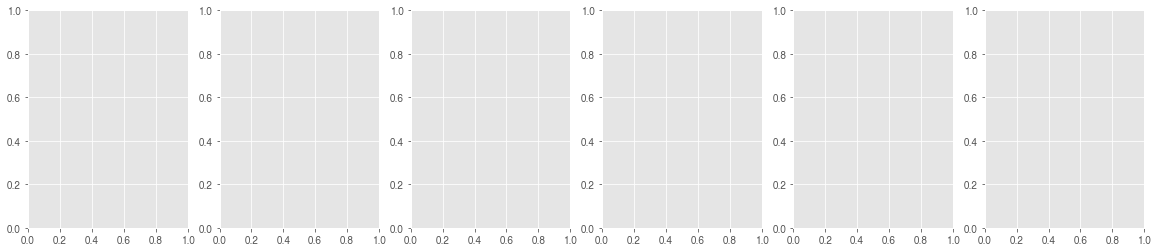

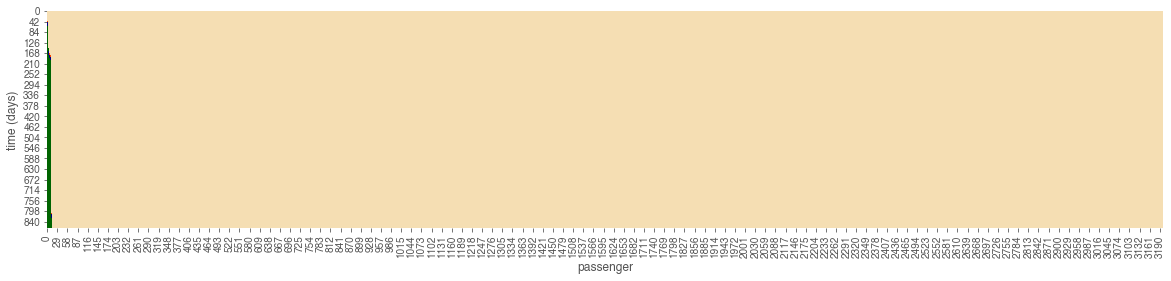

In [227]:
def plot_heat_infection(df, ax = None, cbar = False):
    def for_plot(row):    
        
        if pd.isna(row.infection_day):
            return [0]*days
        else:
            record = list()
            record+=[0]*int(max(0,row.infection_day))
            record+=[1]*int(row.quarantine_day-row.infection_day)
            record+=[2]*14 
            record+=[3]*(days-len(record))
            return record
    #df = pd.read_csv(population_file)
    days = int((df.infection_day.max()+20)*1.05)
    print(days)

    df = df.sort_values('infection_day')
    d = df.apply(lambda x: for_plot(x),axis = 1)
    df2 = pd.DataFrame.from_records(d).T
    cmap = ['wheat','orangered','navy','darkgreen']
    #cmap = sns.color_palette("deep", 4)
    if ax is None:
        fig, ax = plt.subplots()

    sns.heatmap(df2, cmap = cmap, alpha = 1, ax = ax, cbar = cbar)
    if cbar:
        colorbar = ax.collections[0].colorbar 
        colorbar.set_ticks([0.5,3/4+0.5,0.5+2*3/4,0.5+3*3/4])
        colorbar.set_ticklabels(['S','I','Q','R'])
    ax.set_ylabel('time (days)')
    ax.set_xlabel('passenger')
    return ax
fig, ax = plt.subplots(1,6)
df = populations[populations.repl == repl]
plot_heat_infection(df)

---
### read files

In [82]:
import os
ret = list()
for f in os.listdir('res'):
    if f.startswith('pop') and 'init_' in f:
        f.split("_")
        df = pd.read_csv(os.path.join('res',f))
        del df['Unnamed: 0']
        df.index.name = 'day'
        
        df['initial_share'] = (f.split("_")[3])
        df['replication'] = f.split("_")[5][:-4]
        df['id'] = df.index
        ret.append(df[['state','infection_day','initial_share','replication', 'id', 'infected_by']])

population = pd.concat(ret)

#### findings 1. single infectors

distribution of number of infected

In [304]:
to_concat = list()
for repl in population.replication.unique():
    inData.population = population[population.replication == repl]
    inf_map = infection_map(inData)
    inf_map = pd.DataFrame(inf_map).T
    lens, rets, degs = dict(), dict(), dict()
    for i, infector in inf_map.iterrows():
        j = 1
        ret = infector[1].copy()
        while len(infector[j]) > 0:
            j += 1
            ret += infector[j]
        rets[i] = ret
        lens[i] = len(ret)
        degs[i] = j
    inf_map['all_infected'] = pd.Series(rets)
    inf_map['n_infected'] = pd.Series(lens)
    inf_map['degree'] = pd.Series(degs)
    to_concat.append(inf_map)

In [357]:
df.degree.describe()

count   4323.000
mean       2.045
std        1.469
min        1.000
25%        1.000
50%        2.000
75%        2.000
max       14.000
Name: degree, dtype: float64

In [314]:
df = pd.concat(to_concat, axis = 0)

/Users/rkucharski/anaconda3/envs/MaaSSim/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


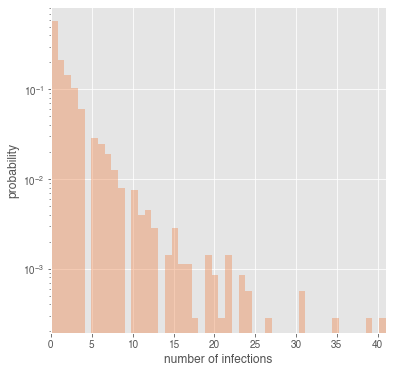

In [376]:
plt.rcParams['figure.figsize'] = [6, 6]
fig, ax = plt.subplots()
sns.distplot(df.n_infected, kde = False, norm_hist = True, ax = ax, color = colors[1])
ax.set_xlim([0,41])
ax.set_yscale('log')
ax.set_ylabel('probability')
_ = ax.set_xlabel('number of infections')

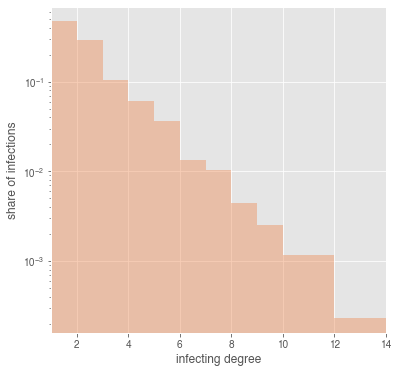

In [386]:
fig, ax = plt.subplots()
sns.distplot(df.degree.astype(int), kde = False, norm_hist = True, ax = ax, bins=np.arange(0,16), color = colors[1])
ax.set_xlim([1,14])
ax.set_yscale('log')
ax.set_ylabel('share of infections')
_ = ax.set_xlabel('infecting degree')

NameError: name 'population' is not defined

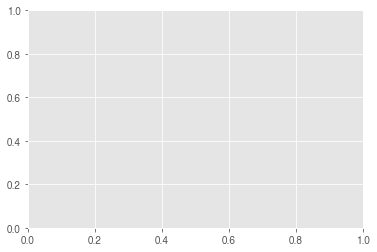

In [69]:
fig, ax = plt.subplots()
for i, share in enumerate([0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    df = population[population['initial_share']==share].pivot(index = 'id',columns = 'replication', values = 'infection_day').T
    sns.distplot(df.count()/10, ax = ax, label = share, rug = False, kde = False)
ax.legend()

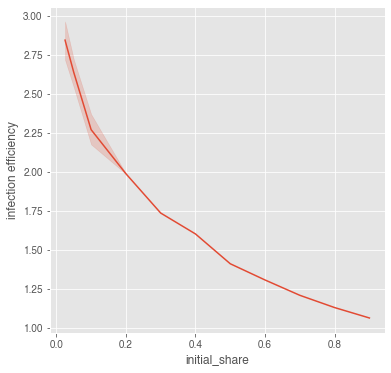

In [115]:
plt.rcParams['figure.figsize'] = [6, 6]
last_days = spreads[spreads.day == 37]
last_days.Q = last_days.Q.astype(float)
last_days['infected'] = last_days.Q/3000
last_days['infection efficiency'] = last_days['infected']/last_days['initial_share'].astype(float)

last_days.initial_share = last_days.initial_share.astype(float)
fig, ax = plt.subplots()
sns.lineplot(y = 'infection efficiency', x = 'initial_share', 
             data = last_days[(last_days['initial_share']>0.02) & (last_days['infection efficiency']>0.02)], ax = ax)
#ax.set_ylim([0,1])
#ax.set_xlim([0,1])
plt.savefig('curve.png')

In [70]:
sns.lineplot(last_days)

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

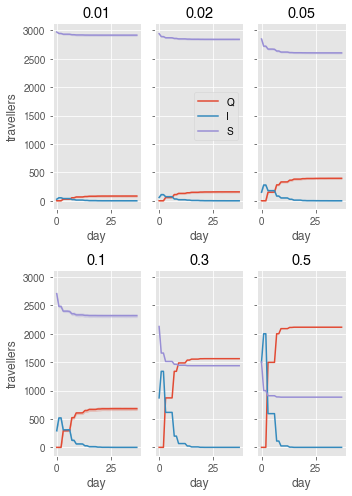

In [105]:
plt.rcParams['figure.figsize'] = [5, 7]
fig, axes = plt.subplots(2,3, sharey =True)
axes = axes.flatten()
for i, share in enumerate([0.01, 0.02, 0.05, 0.1, 0.3, 0.5]):
    df = spreads[spreads.initial_share == share]

    sns.lineplot(x = 'day', y = 'Q', data = df, ax = axes[i], label = 'Q' if i == 1 else None)
    sns.lineplot(x = 'day', y = 'I', data = df, ax = axes[i], label = "I" if i == 1 else None)
    sns.lineplot(x = 'day', y = 'S', data = df, ax = axes[i], label = "S" if i == 1 else None)
    axes[i].set_title(share)
    axes[i].set_ylabel('travellers')

fig.tight_layout()
plt.savefig('spreads.png')

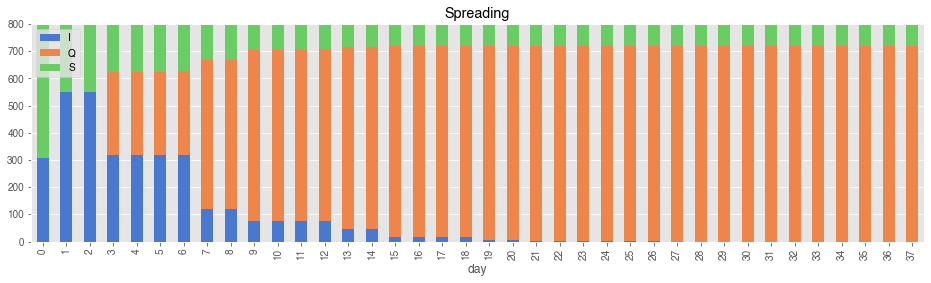

In [446]:
plt.rcParams['figure.figsize'] = [16, 4]
plt.rcParams["font.family"] = "Helvetica"
plt.style.use('ggplot')
colors = sns.color_palette("muted")

fig, axes = plt.subplots()
df = spreads[(spreads.initial_share == 0.1) & (spreads.replication == "repl1584413335.790449.csv")]
df[['I','Q','S']].plot(kind='bar', stacked=True, color = colors[:6], ax=axes)
axes.set_ylim([0, 800])


axes.set_title('Spreading')
axes.set_xlabel('day')
plt.show()

---
params

In [13]:
params = get_config('corona.json')  # configuration, including shareability parameters (to reproduce utility)

In [14]:
inData = load_G(inData, params, stats=True)

In [53]:
inData.population = population
inData.population = inData.population.drop(2505)
inData.population.infection_day = inData.population.infection_day.astype(float) 

In [27]:
inData.requests = pd.read_csv('requests_big.csv')
rides = pd.read_csv('rides_big.csv')
schedule = pd.read_csv('schedule_big.csv')

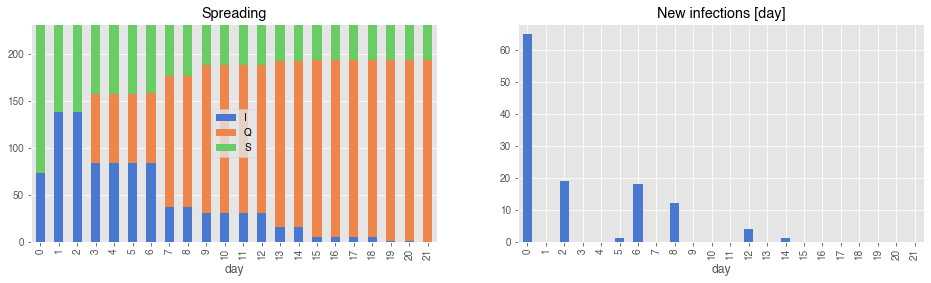

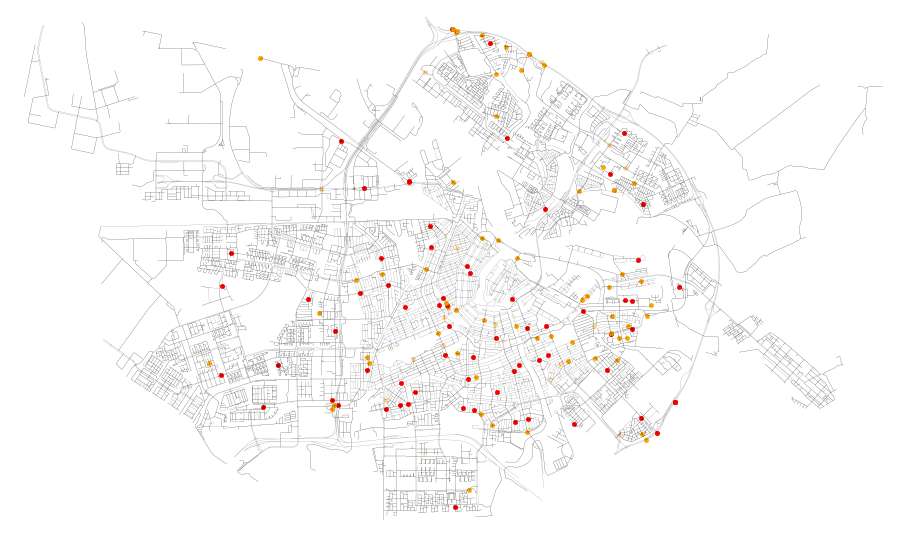

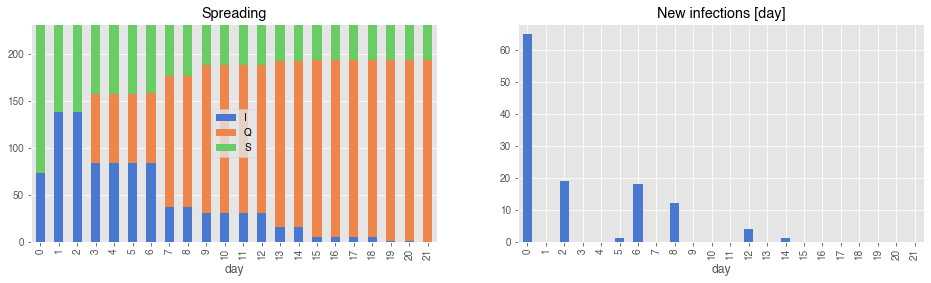

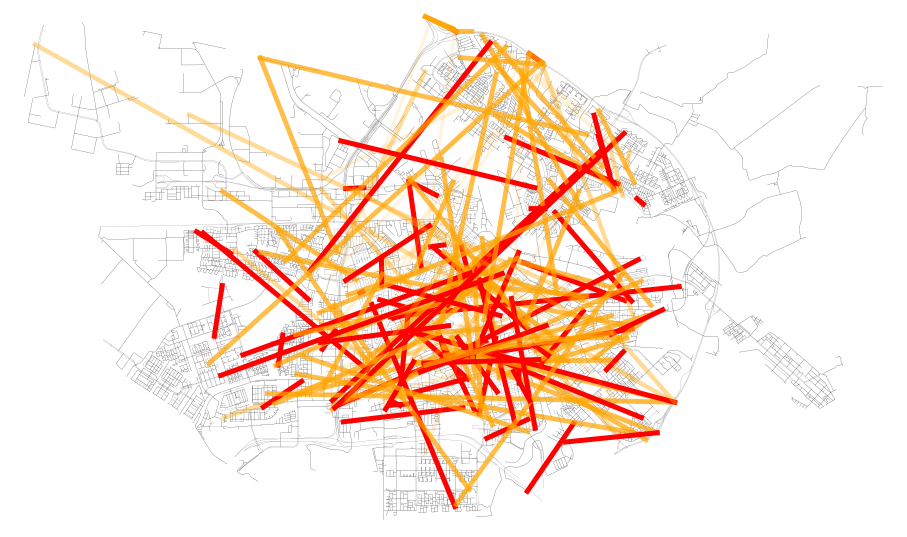

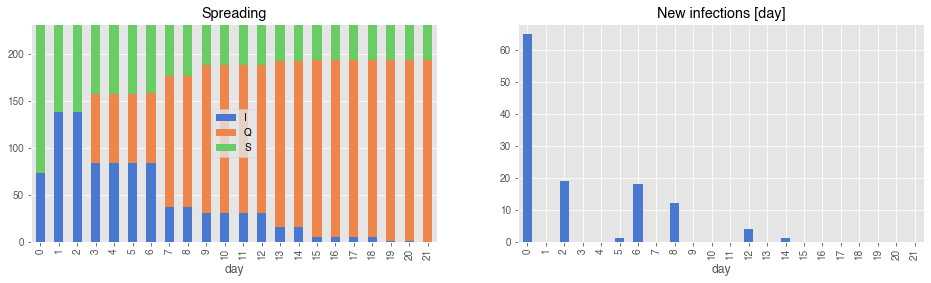

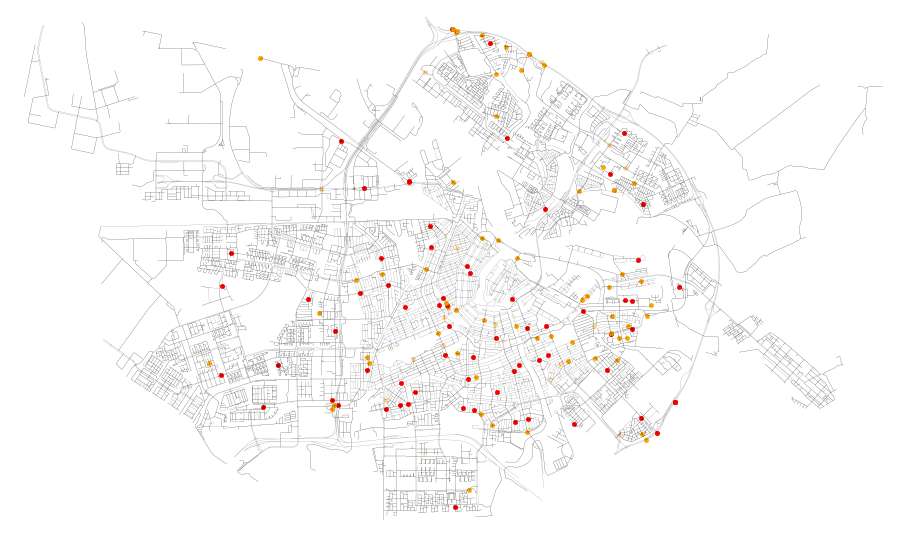

In [63]:
inData.all_requests = inData.requests
inData.report = spread.T
plot_spread(inData, MODE = 'o')
plot_spread(inData, MODE = 'paths')
plot_spread(inData, MODE = 'd')